In [1]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from numpy import sin
from numpy import arange
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

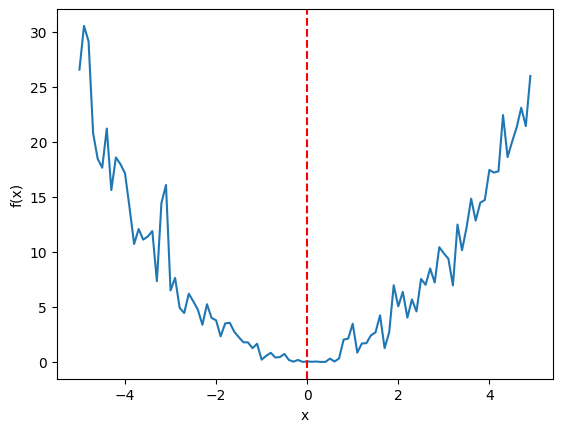

In [2]:
# Define objective function
def objective(x):
    #return x**2.0
    return (x + randn(len(x))*0.3)**2.0
    #return -x * sin(x)

bounds = asarray([[-10.0, 10.0]])
#bounds = asarray([[-10.0, 10.0]])
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')
plt.xlabel("x")
plt.ylabel("f(x)")
# show the plot
plt.show()

In [3]:
# Initialize variables
best = []
best_eval = []
candidate = []
candidate_eval = []
memory = []
memory_eval = []
diff = []
metropolis = []
memory = []
best_eval_list = []
best_list = []

In [4]:
# Simulated annealing parameters
n_iterations = 500
step_size = 0.1
temp = 10
nPop = 10
w = 0.001

## Iteration 0-1

In [5]:
# Make initial guess and save as best then calculate best eval
for i in range(nPop):
    best.append((bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])))
    best_eval.append(objective(best[i]))
#best = []
# Bypass random for training
#best.append(asarray([6.0]))
#best.append(asarray([5.0]))
#best.append(asarray([2.0]))
#best.append(asarray([1.0]))
#print(best)
# Set current equal to best
curr = best[:]
curr_eval = best_eval[:]

In [6]:
for iterate in range(1, 3):
    print("Iteration :", iterate)
    # Clear variables
    candidate =  []
    candidate_eval = []
    diff = []
    metropolis = []

    # Save current to memory
    for i in range(nPop):
        memory.append(curr[i])

    for i in range(nPop):
        # Generate candidate point from current
        candidate.append((curr[i] + randn(len(bounds)) * step_size))
        candidate_eval.append(objective(candidate[i]))
        
        # Compare candidate to previous best
        if candidate_eval[i] < best_eval[i]:
            best[i] = candidate[i]
            best_eval[i] = candidate_eval[i]

        # Calculate metropolis
        diff.append(candidate_eval[i] - curr_eval[i])
        t = temp / float(1)
        metropolis.append(exp(-diff[i]/t))

        # Perform simulated annealing
        if diff[i] < 0: #or rand() > metropolis[i]:
            curr[i] = candidate[i]
            curr_eval[i] = candidate_eval[i]
        #print("Pop ", i, round(best[i][0], 12), round(best_eval[i],12))
        print("Pop ", i, round(best[i][0], 12), best_eval[i])
        best_eval_list.append(best_eval[i])
        best_list.append(best[i])

Iteration : 1
Pop  0 -4.454232163 [16.5970032]
Pop  1 -4.526614751077 [17.97932278]
Pop  2 9.432820064504 [75.58249677]
Pop  3 -4.105197252317 [17.2017347]
Pop  4 7.379754059845 [50.30937436]
Pop  5 -6.142559565573 [33.76433171]
Pop  6 1.658529994128 [2.21722269]
Pop  7 9.379606216974 [79.44797149]
Pop  8 1.224553089737 [0.886228]
Pop  9 -9.494351581717 [79.94297788]
Iteration : 2
Pop  0 -4.454232163 [16.5970032]
Pop  1 -4.526614751077 [17.97932278]
Pop  2 9.432820064504 [75.58249677]
Pop  3 -4.019806109501 [12.56369843]
Pop  4 7.379754059845 [50.30937436]
Pop  5 -6.142559565573 [33.76433171]
Pop  6 1.658529994128 [2.21722269]
Pop  7 9.286635600934 [77.77667083]
Pop  8 1.224553089737 [0.886228]
Pop  9 -9.494351581717 [79.94297788]


## Iteration 3 onwards

In [7]:
for iterate in range(3, n_iterations - 2):
    print("Iteration :", iterate)
    # Clear variables
    candidate =  []
    candidate_eval = []
    diff = []
    metropolis = []
    memory_eval = []
    elite = []
    curr_new = []
    curr_new_eval = []

    # Save current to memory
    for i in range(nPop):
        memory.append(curr[i])
    
    # Calculate objective function of memory
    for i in range(len(memory)):
        memory_eval.append(objective(memory[i]))

    # Select elite experience 
    #elite = sorted(memory_eval)[:2]
    #elite = random.sample(memory_eval, 2)
    elite = random.sample(memory, 2)

    for i in range(nPop):
        # Create new current based on elite experience
        curr_new.append(curr[i] + iterate * w *(random.random() * (elite[0] - curr[i]) + random.random() * (elite[1] - curr[i])))
        curr_new_eval.append(objective(curr_new[i]))

        # Generate candidate point from new current
        candidate.append((curr_new[i] + randn(len(bounds)) * step_size))
        candidate_eval.append(objective(candidate[i]))
        
        # Compare candidate to previous best
        if candidate_eval[i] < best_eval[i]:
            best[i] = candidate[i]
            best_eval[i] = candidate_eval[i]

        # Calculate metropolis
        diff.append(candidate_eval[i] - curr_eval[i])
        t = temp / float(1)
        metropolis.append(exp(-diff[i]/t))

        # Perform simulated annealing
        if diff[i] < 0: #or rand() > metropolis[i]:
            curr[i] = candidate[i]
            curr_eval[i] = candidate_eval[i]
        #print("Pop ", i, round(best[i][0], 12), round(best_eval[i],12))
        print("Pop ", i, round(best[i][0], 12), best_eval[i])
        best_eval_list.append(best_eval[i])
        best_list.append(best[i])

Iteration : 3
Pop  0 -4.454232163 [16.5970032]
Pop  1 -4.526614751077 [17.97932278]
Pop  2 9.432820064504 [75.58249677]
Pop  3 -4.019806109501 [12.56369843]
Pop  4 7.379754059845 [50.30937436]
Pop  5 -6.142559565573 [33.76433171]
Pop  6 1.658529994128 [2.21722269]
Pop  7 9.286635600934 [77.77667083]
Pop  8 1.224553089737 [0.886228]
Pop  9 -9.494351581717 [79.94297788]
Iteration : 4
Pop  0 -4.454232163 [16.5970032]
Pop  1 -4.526614751077 [17.97932278]
Pop  2 9.432820064504 [75.58249677]
Pop  3 -4.024456582826 [11.96317218]
Pop  4 7.379754059845 [50.30937436]
Pop  5 -6.126840176796 [33.69951288]
Pop  6 1.658529994128 [2.21722269]
Pop  7 9.286635600934 [77.77667083]
Pop  8 1.224553089737 [0.886228]
Pop  9 -9.494351581717 [79.94297788]
Iteration : 5
Pop  0 -4.454232163 [16.5970032]
Pop  1 -4.539826204531 [16.96280162]
Pop  2 9.432820064504 [75.58249677]
Pop  3 -4.024456582826 [11.96317218]
Pop  4 7.379754059845 [50.30937436]
Pop  5 -6.164092710705 [31.86659602]
Pop  6 1.658529994128 [2.217

In [8]:
convergence_1 = np.reshape(best_eval_list, (int(len(best_eval_list)/nPop), nPop))
convergence_2 = np.reshape(best_list, (int(len(best_eval_list)/nPop), nPop))
conv_1 = pd.DataFrame(convergence_1)
conv_2 = pd.DataFrame(convergence_2)
conv_1['iter'] = range(1, len(conv_1)+1)
conv_2['iter'] = range(1, len(conv_2)+1)

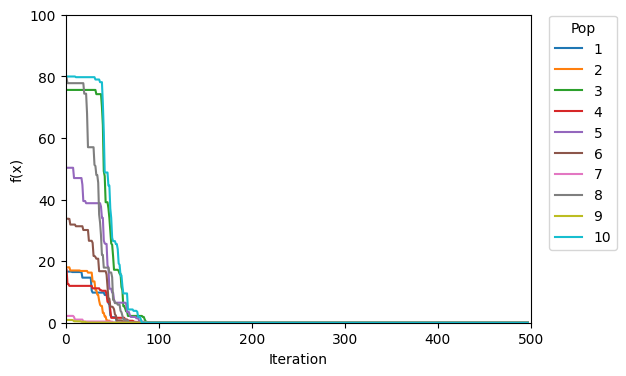

In [9]:
plt.figure(figsize=[6, 4])
for i in range(0, nPop):
    plt.plot(conv_1['iter'], conv_1[i], label=str(i+1))
plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.legend(bbox_to_anchor = (1.2, 1.02), title="Pop")
plt.show()

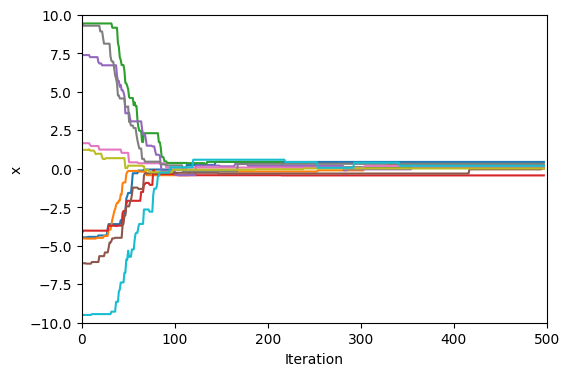

In [10]:
plt.figure(figsize=[6, 4])
for i in range(0, nPop):
    plt.plot(conv_2['iter'], conv_2[i], label=str(i+1))
plt.xlabel("Iteration")
plt.ylabel("x")
plt.xlim(0, 500)
plt.ylim(-10.0, 10.0)
#plt.legend(bbox_to_anchor = (1.0, 1.02), title="Pop")
plt.show()